<a href="https://colab.research.google.com/github/amandahaff/MAT422/blob/main/1_3_HW_Haffner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.3 Linear Regression**

QR Composition


In [ ]:
import numpy as np
A = np.array([[12,-51,4],[6,167,-68],[-4,24,-41]])
print("Vector A")
print(A)
v1 = np.array([12,6,-4])
v2 = np.array([-51,167,24])
v3 = np.array([4,-68,-41])
print("v1, v2, and v3")
print(v1, v2, v3)
print("Normalize v1")
print("u1 = v1/length of v1")
lengthv1 = np.linalg.norm(v1)
u1 = v1/np.linalg.norm(v1)
print("u1 = ",u1)
print("Now make v2 orthogonal to u1.")
print("u2 = v2 - Proj(v1)v2")
proj_of_v2_on_v1 = (np.dot(v2, v1)/lengthv1**2)*v1
U2 = v2 - proj_of_v2_on_v1
print("u2 = ", U2)
print("Normalize u2")
lengthU2 = np.linalg.norm(U2)
u2 = U2/np.linalg.norm(U2)
print("u2 = ", u2)
print("Now make v3 orthogonal to u1 and u2.")
print("u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)")
a = (np.dot(v3, u1))
b = (np.dot(v3, u2))
U3 = v3 - ((np.multiply(a,u1)) + (np.multiply(b,u2)) )
print("u3 = ", U3)
print("Normalize u3")
lengthU3 = np.linalg.norm(U3)
u3 = U3/np.linalg.norm(U3)
print("u3 = ", u3)
print("Vector Q = [u1, u2, u3]")
Q = np.array(([6/7,-69/175,-58/175],[3/7,158/175,6/175],[-2/7,6/35,-33/35]))
print(Q)

Vector A
[[ 12 -51   4]
 [  6 167 -68]
 [ -4  24 -41]]
v1, v2, and v3
[12  6 -4] [-51 167  24] [  4 -68 -41]
Normalize v1
u1 = v1/length of v1
u1 =  [ 0.85714286  0.42857143 -0.28571429]
Now make v2 orthogonal to u1.
u2 = v2 - Proj(v1)v2
u2 =  [-69. 158.  30.]
Normalize u2
u2 =  [-0.39428571  0.90285714  0.17142857]
Now make v3 orthogonal to u1 and u2.
u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)
u3 =  [-11.6   1.2 -33. ]
Normalize u3
u3 =  [-0.33142857  0.03428571 -0.94285714]
Vector Q = [u1, u2, u3]
[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]


Output of R should be upper triangular matrix

In [ ]:
print("Q(Transposed)A = Q(Transposed)QR = R")
QT = np.transpose(Q)
R = QT @ A
r = np.rint(R)
print("Vector R is an upper triangular matrix.")
print(r)

Q(Transposed)A = Q(Transposed)QR = R
Vector R is an upper triangular matrix.
[[ 14.  21. -14.]
 [ -0. 175. -70.]
 [  0.  -0.  35.]]


Verify if A = QR

In [ ]:
# Calculate A=QR
AQR = np.dot(Q, R)
print(f"A:\n {A} \n")
print(f"QR:\n {AQR} \n")

# Check if QR = A
QR_is_A = np.allclose(AQR, A)
print(f"QR {'==' if QR_is_A else '!='} A")

A:
 [[ 12 -51   4]
 [  6 167 -68]
 [ -4  24 -41]] 

QR:
 [[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]] 

QR == A


Least-Squares

In [ ]:
import plotly.express as px
# Set Plotly theme
import plotly.io as pio
pio.templates.default = "seaborn"


def generate_random_data(start = 0, end = 100, spacing = 0.1, noise = 1):
    """
    Generates Random Linear Data
    :param start: Starting X Value
    :param end: Ending X Value
    :param spacing: Spacing between values
    :param noise: Noise Ratio
    :return: X, Y
    """
    # Generate X values from params
    X = np.arange(start=start, stop=end, step=spacing)

    # Generate Y values from X and noise
    y_b = np.random.randint(start, end)
    y_m = np.random.randint(-10, 10)

    Y = y_b + (y_m * X) + (np.random.random(len(X)) * noise * 100)

    return X, Y, (y_m, y_b)
def get_line(X, slope, intercept):
    """
    Generate Line from Slope and Intercept
    """
    return X * slope + intercept
def ols(X, Y):
    """
    Ordinary Least Squares
    :param X: X values
    :param Y: Y values
    :return: (slope, intercept)
    """
    # Add ones column to X
    x = np.vstack([X, np.ones(len(X))]).T

    # Convert Y into a column vector
    y = Y[:, np.newaxis]

    # Apply OLS
    p_inv = np.linalg.pinv(x)
    y_params = p_inv.dot(y)

    return round(y_params[0][0], 3), round(y_params[1][0], 3)
# Generate random data
x_rand, y_rand, (y_slope, y_int) = generate_random_data()

# Apply OLS
ols_m, ols_b = ols(x_rand, y_rand)
print(f"OLS Fit: Y = {ols_m}X + {ols_b}")
print(f"Slope Error: {(abs(y_slope - ols_m)) /y_slope *100:.2f}%")
print(f"Intercept Error: {(abs(y_int - ols_b)) /y_int *100:.2f}%")

# Add the Scatter Plot of Random Points
fig = px.scatter(
    x=x_rand,
    y=y_rand,
    title=f"Ordinary Least Squares (Y = {y_slope}X + {y_int})",
)

# Update markers size
fig.update_traces(marker=dict(size=2))

# Plot the Best Fit Line from OLS
fig.add_traces(
    px.line(
        x=x_rand,
        y=get_line(x_rand, ols_m, ols_b),
        color_discrete_sequence=["red"],
    ).data
)

fig.show()
#open in colab to view graph

OLS Fit: Y = -4.969X + 61.11
Slope Error: -0.62%
Intercept Error: 370.08%


Linear Regression

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


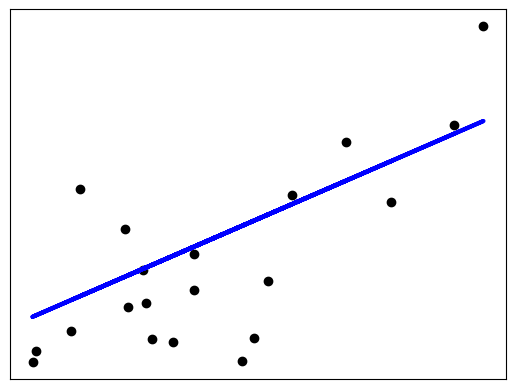

In [ ]:

print(__doc__)


# Code source: Jaques Grobler
# link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
def slr(X, Y):
    """
    Simple Linear Regression
    :param X: X values
    :param Y: Y values
    :return: (slope, intercept)
    """

    # Calculate Means
    x_avg = np.mean(X)
    y_avg = np.mean(Y)

    # Calculate Sx = xi - x_avg
    sx = X - x_avg

    # Calculate Sxx
    sxx = np.sum(sx ** 2)

    # Calculate Sxy
    sxy = np.dot((X-x_avg), (Y-y_avg))

    # Calculate Slope
    slope = sxy / sxx

    # Calculate Intercept
    intercept = y_avg - slope * x_avg

    return round(slope, 3), round(intercept, 3)
# Apply Simple Linear Regression using same old random data
slr_m, slr_b = slr(x_rand, y_rand)
print(f"SLR Fit: Y = {slr_m}X + {slr_b}")
print(f"Slope Error: {(abs(y_slope - slr_m)) /y_slope *100:.2f}%")
print(f"Intercept Error: {(abs(y_int - slr_b)) /y_int *100:.2f}%")

# Add the Scatter Plot of Random Points
fig = px.scatter(
    x=x_rand,
    y=y_rand,
    title=f"Simple Linear Regression (Y = {y_slope}X + {y_int})",
)

# Update markers size
fig.update_traces(marker=dict(size=2))

# Plot the Best Fit Line from OLS
fig.add_traces(
    px.line(
        x=x_rand,
        y=(x_rand*slr_m + slr_b),
        color_discrete_sequence=["red"],
    ).data
)

fig.show()
#open in colab to view graph

SLR Fit: Y = -4.969X + 61.11
Slope Error: -0.62%
Intercept Error: 370.08%
